In [31]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.spatial import ConvexHull

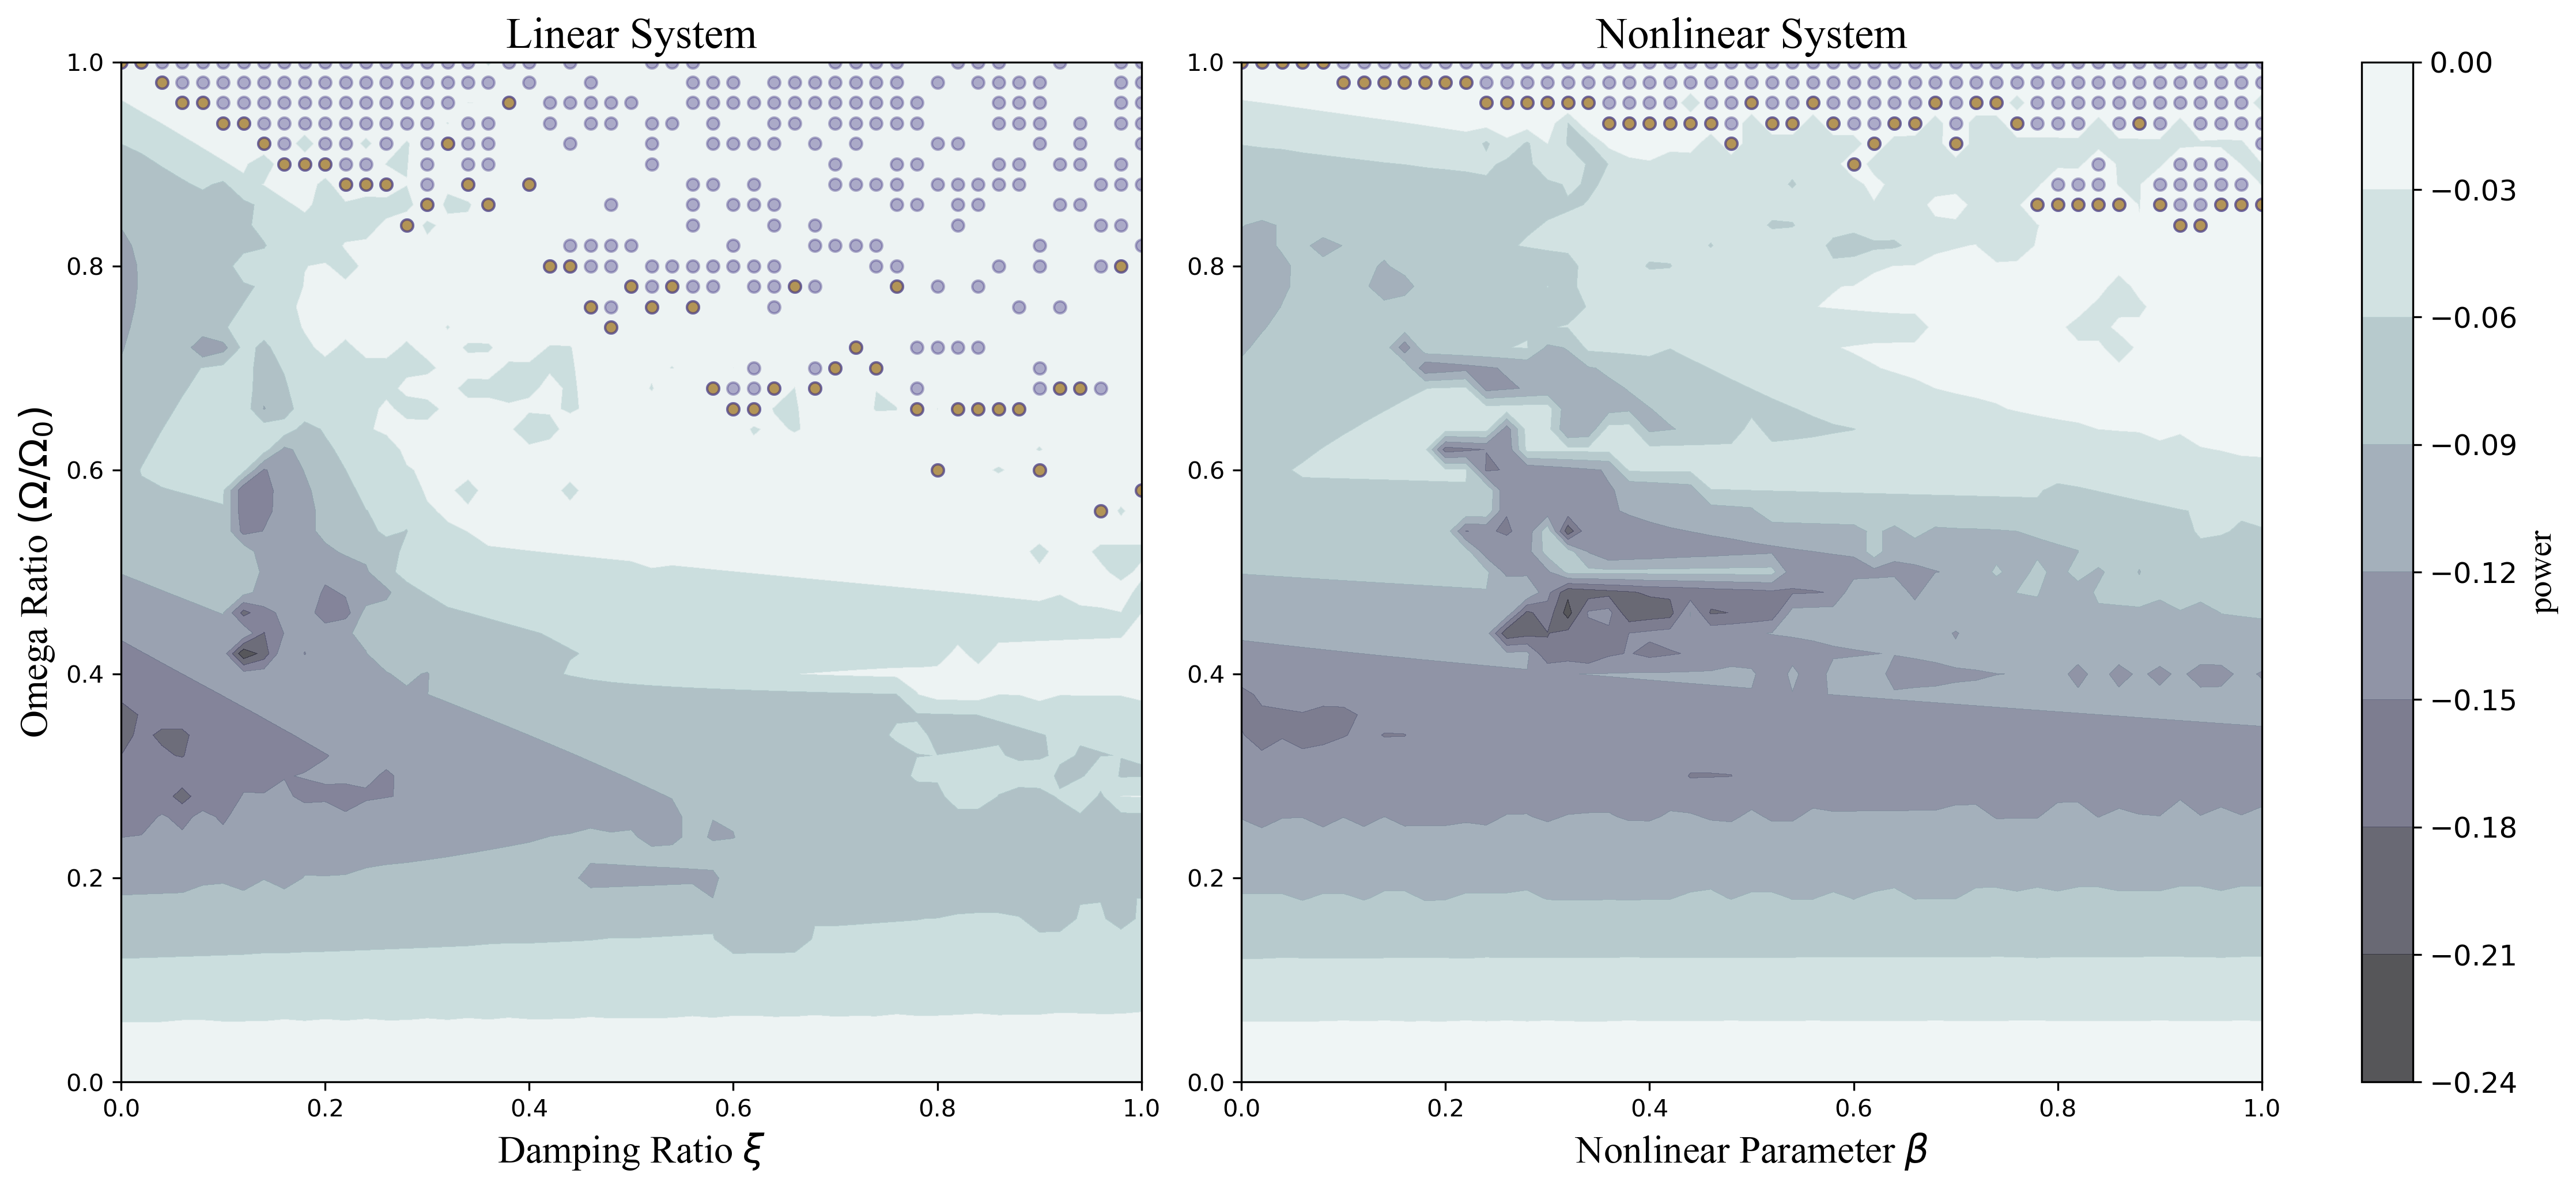

In [78]:
#Use subplot and com-plot the Linear System and Nonlinear System

fig = plt.figure(figsize=(15,15),dpi=300)
plt.rcParams['axes.grid'] = False
gs=gridspec.GridSpec(1, 3, width_ratios=[1,1,0.05])

Lin = plt.subplot(gs[0])
NonL = plt.subplot(gs[1])
cax = plt.subplot(gs[2])

Lin.set_aspect('equal')
NonL.set_aspect('equal')
cax.set_aspect(20)
#linear system 

#create dataframe
#read dataset as df
df = pd.read_csv('LinearSystem_datasetforPlot.csv')

#get valid data from the dataset
#get valid data from the dataset
zeta = np.array(df.zeta)
omega_ratio = np.array(df.omega_ratio)
power = np.array(df.power)
#zeta

#reshape 1D vec -> 2D matrix

#dimension of sz
sz = int(np.sqrt(len(zeta)))

z = zeta.reshape(sz,sz)
OR = omega_ratio.reshape(sz,sz)
P = power.reshape(sz,sz)
#P

#add the powerpart
Prj_z = []
Prj_omega = []

for i in range(0,sz):
    for j in range(0,sz):
        if abs(P[i,j]) <= 0.005:
            if OR[i,j]>0:
                Prj_z = np.append(Prj_z,z[i,j])
                Prj_omega = np.append(Prj_omega,OR[i,j])

#add the edges

#find the approximated points coordinates at the lower bound (use dataframe)

df_zOR = pd.DataFrame({'new_z':Prj_z,'new_omega':Prj_omega })
edge_df = df_zOR.groupby('new_z').min('new_omega')

z_coord = np.array(edge_df.index)
omega_coord = np.array(edge_df.new_omega)

#Nonlinear System

#create dataframe
#read dataset as df
df2 = pd.read_csv('Nonlinear_dataset_forPlot.csv')
#print(df2)

#get valid data from the dataset
beta = np.array(df2.beta)
omega_ratio2 = np.array(df2.omega)
power2 = np.array(df2.power)
#beta

#reshape 1D vec -> 2D matrix

#dimension of sz
sz2 = int(np.sqrt(len(beta)))

b = beta.reshape(sz2,sz2)
OR2 = omega_ratio.reshape(sz2,sz2)
P2 = power2.reshape(sz2,sz2)
#P2

#add the powerpart
Prj_b = []
Prj_omega2 = []

for i in range(0,sz):
    for j in range(0,sz):
        if abs(P2[i,j]) <= 0.005:
            if OR2[i,j]>0:
                Prj_b = np.append(Prj_b,b[i,j])
                Prj_omega2 = np.append(Prj_omega2,OR2[i,j])

#add the edges

#find the approximated points coordinates at the lower bound (use dataframe)

df2_zOR = pd.DataFrame({'new_b':Prj_b,'new_omega':Prj_omega2 })
edge2_df = df2_zOR.groupby('new_b').min('new_omega')

b_coord = np.array(edge2_df.index)
omega2_coord = np.array(edge2_df.new_omega)

#com-plot
#a = ax.pcolormesh(dataset1, norm=norm, cmap=plt.get_cmap('rainbow'))
#b = bx.pcolormesh(dataset2, norm=norm, cmap=plt.get_cmap('rainbow'))
#fig.colorbar(a, ax=[ax, bx], shrink=0.5)
power_im = Lin.contourf(z,OR,P,cmap = 'bone',alpha=0.7)
Lin.scatter(Prj_z, Prj_omega, c="#483D88" , edgecolor = "#483D88", alpha=0.4, cmap='Pastel1', marker = '.',s = 100)
Lin.scatter(z_coord, omega_coord, c="#B8860B" ,edgecolor = "#483D88", alpha=0.6, marker = '.',s = 100)

power2_im = NonL.contourf(b,OR2,P2,cmap = 'bone',alpha=0.7)
NonL.scatter(Prj_b, Prj_omega2, c="#483D88" , edgecolor = "#483D88", alpha=0.4, cmap='Pastel1', marker = '.',s = 100)
NonL.scatter(b_coord, omega2_coord, c="#B8860B" ,edgecolor = "#483D88", alpha=0.6, marker = '.',s = 100)

fc = fig.colorbar(power2_im,cax = cax)
fc.ax.tick_params(labelsize = 12)  #fontsize
font = {'family' : 'Times New Roman',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 14,
        }
fc.set_label('power',fontdict=font) 

Lin.set_xlabel( r"Damping Ratio $\xi$",fontsize = 16,fontdict=font)
Lin.set_ylabel(r"Omega Ratio $(\Omega/\Omega_{0})$",fontsize = 16,fontdict=font)
Lin.set_title('Linear System',fontdict=font,fontsize = 18)

NonL.set_xlabel( r"Nonlinear Parameter $\beta$",fontsize = 16,fontdict=font)
NonL.set_title('Nonlinear System',fontdict=font,fontsize = 18)





plt.tight_layout()
plt.savefig('Linear-Nonlinear scatterPlot.png')
plt.show()


#print(df2_zOR)
#print(edge2_df)